# IRIS FLOWER CLASSIFICATION

## The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species

In [89]:
#Import modules
import pandas as p
import numpy as n
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = p.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
#displying about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [92]:
#basic information about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
#to display no. of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the database

In [94]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

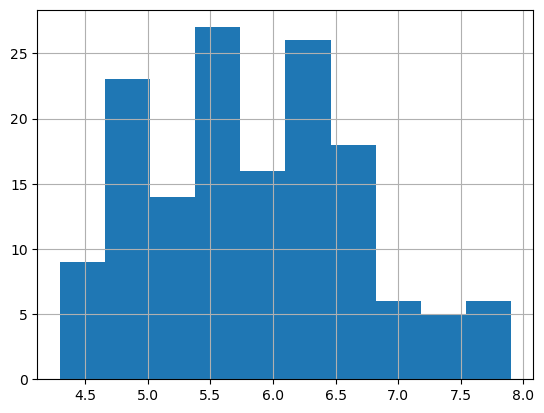

In [95]:
#histograms
df['sepal_length'].hist()

<Axes: >

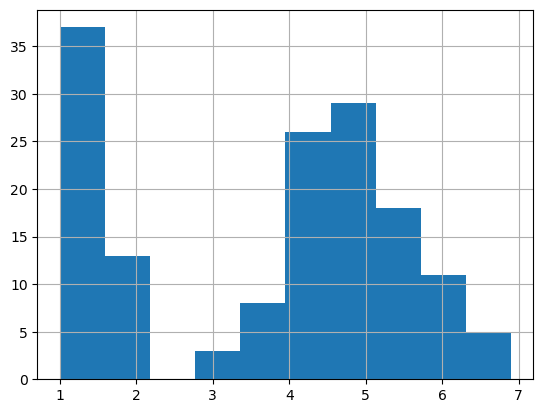

In [96]:
df['petal_length'].hist()

In [97]:
#scatterplot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

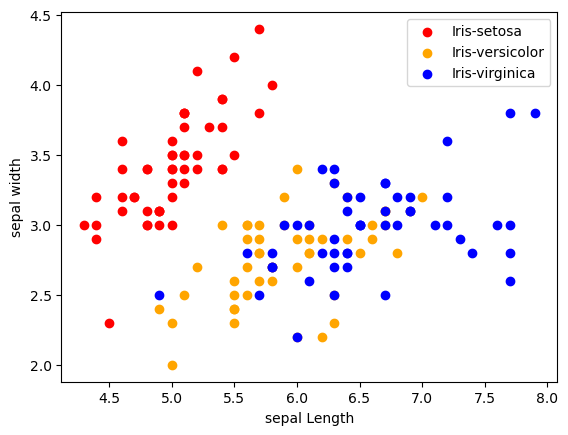

In [98]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("sepal width")
    plt.legend()

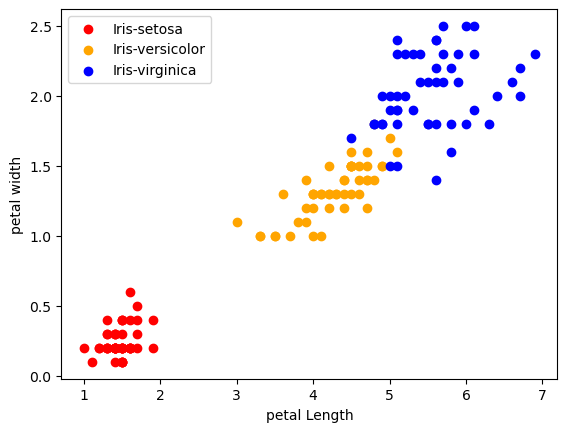

In [99]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
    plt.xlabel("petal Length")
    plt.ylabel("petal width")
    plt.legend()

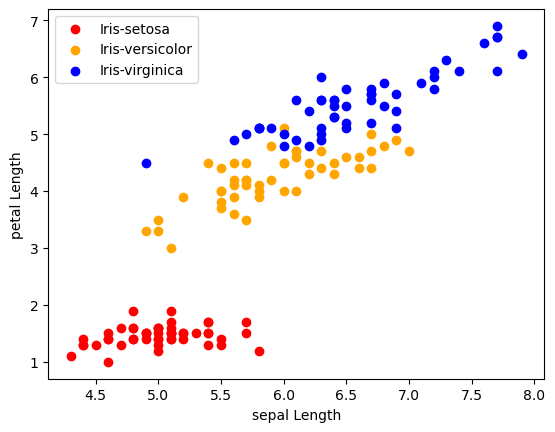

In [100]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c = colors[i],label=species[i])
    plt.xlabel("sepal Length")
    plt.ylabel("petal Length")
    plt.legend()

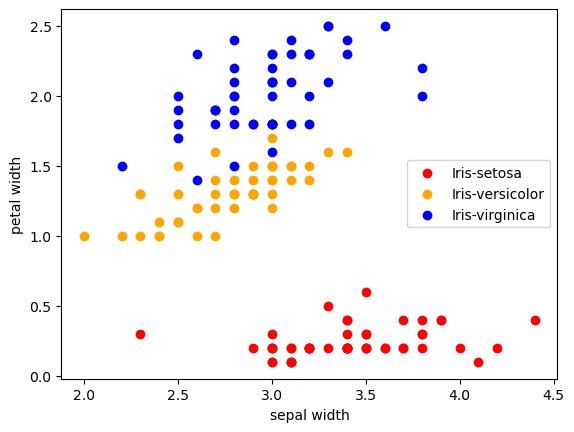

In [101]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i],label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal width")
    plt.legend()

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [102]:
df.corr()

C:\Users\mayuresh dande\AppData\Local\Temp\ipykernel_17828\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\mayuresh dande\AppData\Local\Temp\ipykernel_17828\2887727089.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

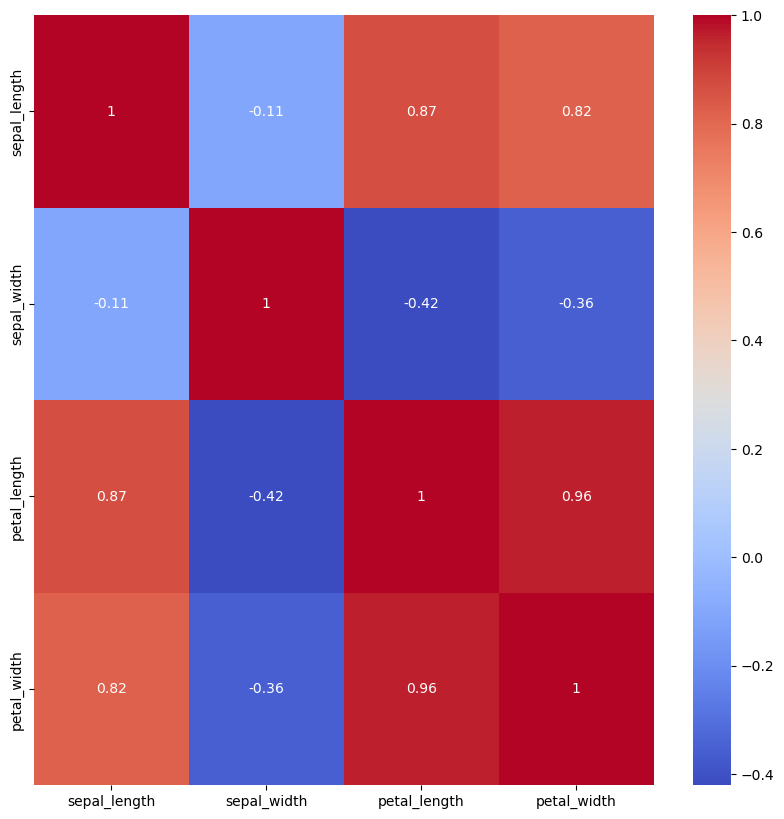

In [103]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,ax=ax,cmap='coolwarm')

# Label Encoder

In machine learning, we deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. it is very helpful

In [104]:
from sklearn.preprocessing import LabelEncoder 
le =  LabelEncoder()

In [105]:
df['species'] = le.fit_transform(df[ 'species']) 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# in first,species are in the form of strings and now it will converted in to the form of numeric.

# Model Training

In [106]:
from sklearn.model_selection import train_test_split
# train 70
# test - 30 
x= df.drop(columns=['species'])
Y = df[ 'species']
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.30)

In [107]:
#logistic regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [108]:
model.fit(x_train, y_train)

LogisticRegression()

In [109]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [110]:
from sklearn.neighbors import KNeighborsClassifier 
model =  KNeighborsClassifier()

In [111]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [113]:
#decision tree
from sklearn. tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [114]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [115]:
#print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556
